<a href="https://colab.research.google.com/github/srilalithaveerubhotla/GERMAN_CREDIT_DATA_CLASSIFICATION/blob/master/ML_MIDTERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this kernel im trying to get some insights and statistical understanding about german credit data and implemented machine learning algorithms explained in detail below

### **Data source** :[GERMAN CREDIT DATASET](http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/)
### **OBSERVATIONS AND EXPLANATIONS OF DATA**
  ### **Business case and value**
  ### >> Trying to understand how the financial credit data is based on critical features like credit amount , credit history and other few numericals and classifying whether given application is a good customer or bad customer  on a high level its a binary classification problem.
### ps: Other delevarable points are continued along with the code explanations as text explaining in detailed about implementations.

In [0]:
# LIBRARIES FOR DATACLEANING, PRE-PROCESSING, VISUALIZATIONS
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import gridspec
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE
from IPython.display import Image  
from collections import defaultdict
from sklearn.dummy import DummyClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import plotly.figure_factory as ff
from plotly.offline import *
import plotly


# LIBARARIES FOR MODELLING
from sklearn import svm, tree
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
from yellowbrick.features import Manifold
from yellowbrick.datasets import load_occupancy
from sklearn.pipeline import Pipeline
from factor_analyzer import FactorAnalyzer
from sklearn.feature_selection import f_classif, SelectKBest
from scipy.spatial.distance import cdist 
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.manifold import MDS
from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression, SGDClassifier

## Data Narration has covered 
### 1. Data description , size and shape
### 2. Checking the null values 
### 3. Checking for class imbalances and class distributions

In [194]:
# DATA IMPORTING
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',names=names,sep=" ")
print(data.shape)
print (data.columns)
data.head(10)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2


In [195]:
# CHECKING NULL VALUES
print(data.isnull().sum().sum())

0


In [0]:
# encoding categorical features into numerical
data['classification']=pd.factorize(data['classification'])[0]

Text(0.5, 1.0, 'Class Distributions \n \n (0: No loan And 1: loan approved)')

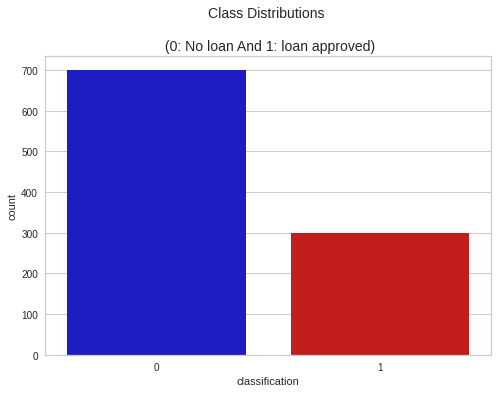

In [197]:
# A histogram which explains the class distribution 
colors = ["#0101DF", "#DF0101"]
sns.countplot('classification', data=data, palette=colors)
plt.title('Class Distributions \n \n (0: No loan And 1: loan approved)', fontsize=14)

In [0]:
# categorical features list
catg= ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']

In [199]:
data.statussex.unique()

array(['A93', 'A92', 'A91', 'A94'], dtype=object)

In [0]:
data[catg]=data[catg].astype('category')

In [0]:
# converting all categorical features into numercial by encoding 
data[catg]=data[catg].apply(lambda x: x.cat.codes)

In [202]:
data.statussex.unique()

array([2, 1, 0, 3], dtype=int8)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



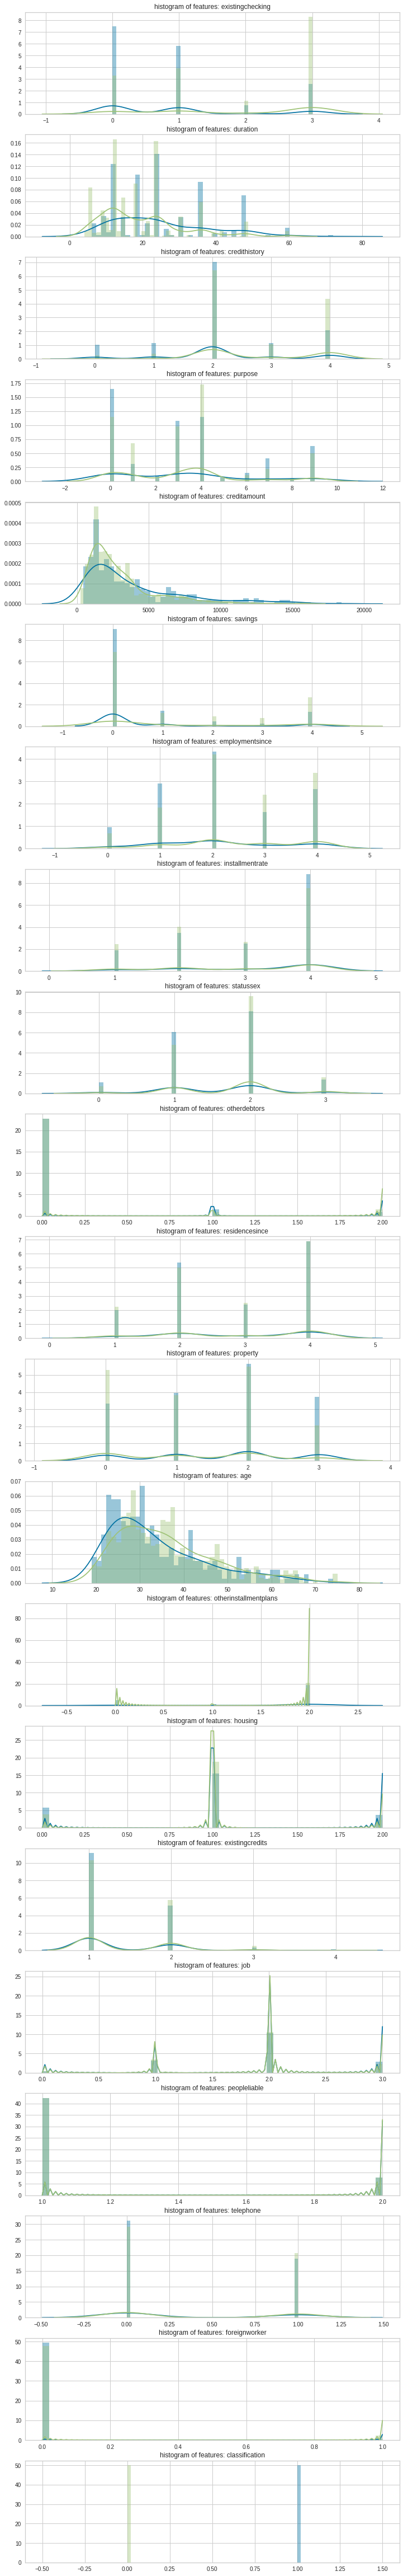

In [203]:
# distribution of anomalous features

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[data.columns]):
 ax = plt.subplot(gs[i])
 sns.distplot(data[c][data.classification == 1], bins=50)
 sns.distplot(data[c][data.classification == 0], bins=50)
 ax.set_xlabel("")
 ax.set_title('histogram of features: ' + str(c))
plt.show()

## Visualizations 
### I covered a wide range of different kinds of visualisations in different sectors of data which very breifly explained as comments at each cell level.

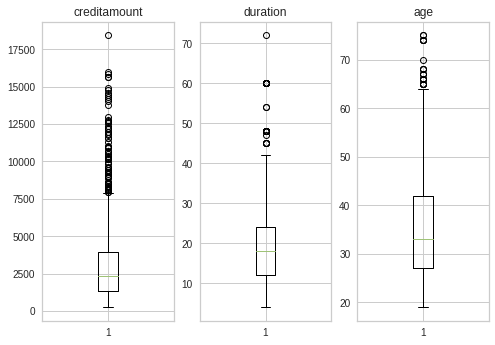

In [204]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].boxplot(data['creditamount'])
axes[0].set_title('creditamount')
axes[1].boxplot(data['duration'])
axes[1].set_title('duration')
axes[2].boxplot(data['age'])
axes[2].set_title('age')

fig.savefig("boxplots.png")

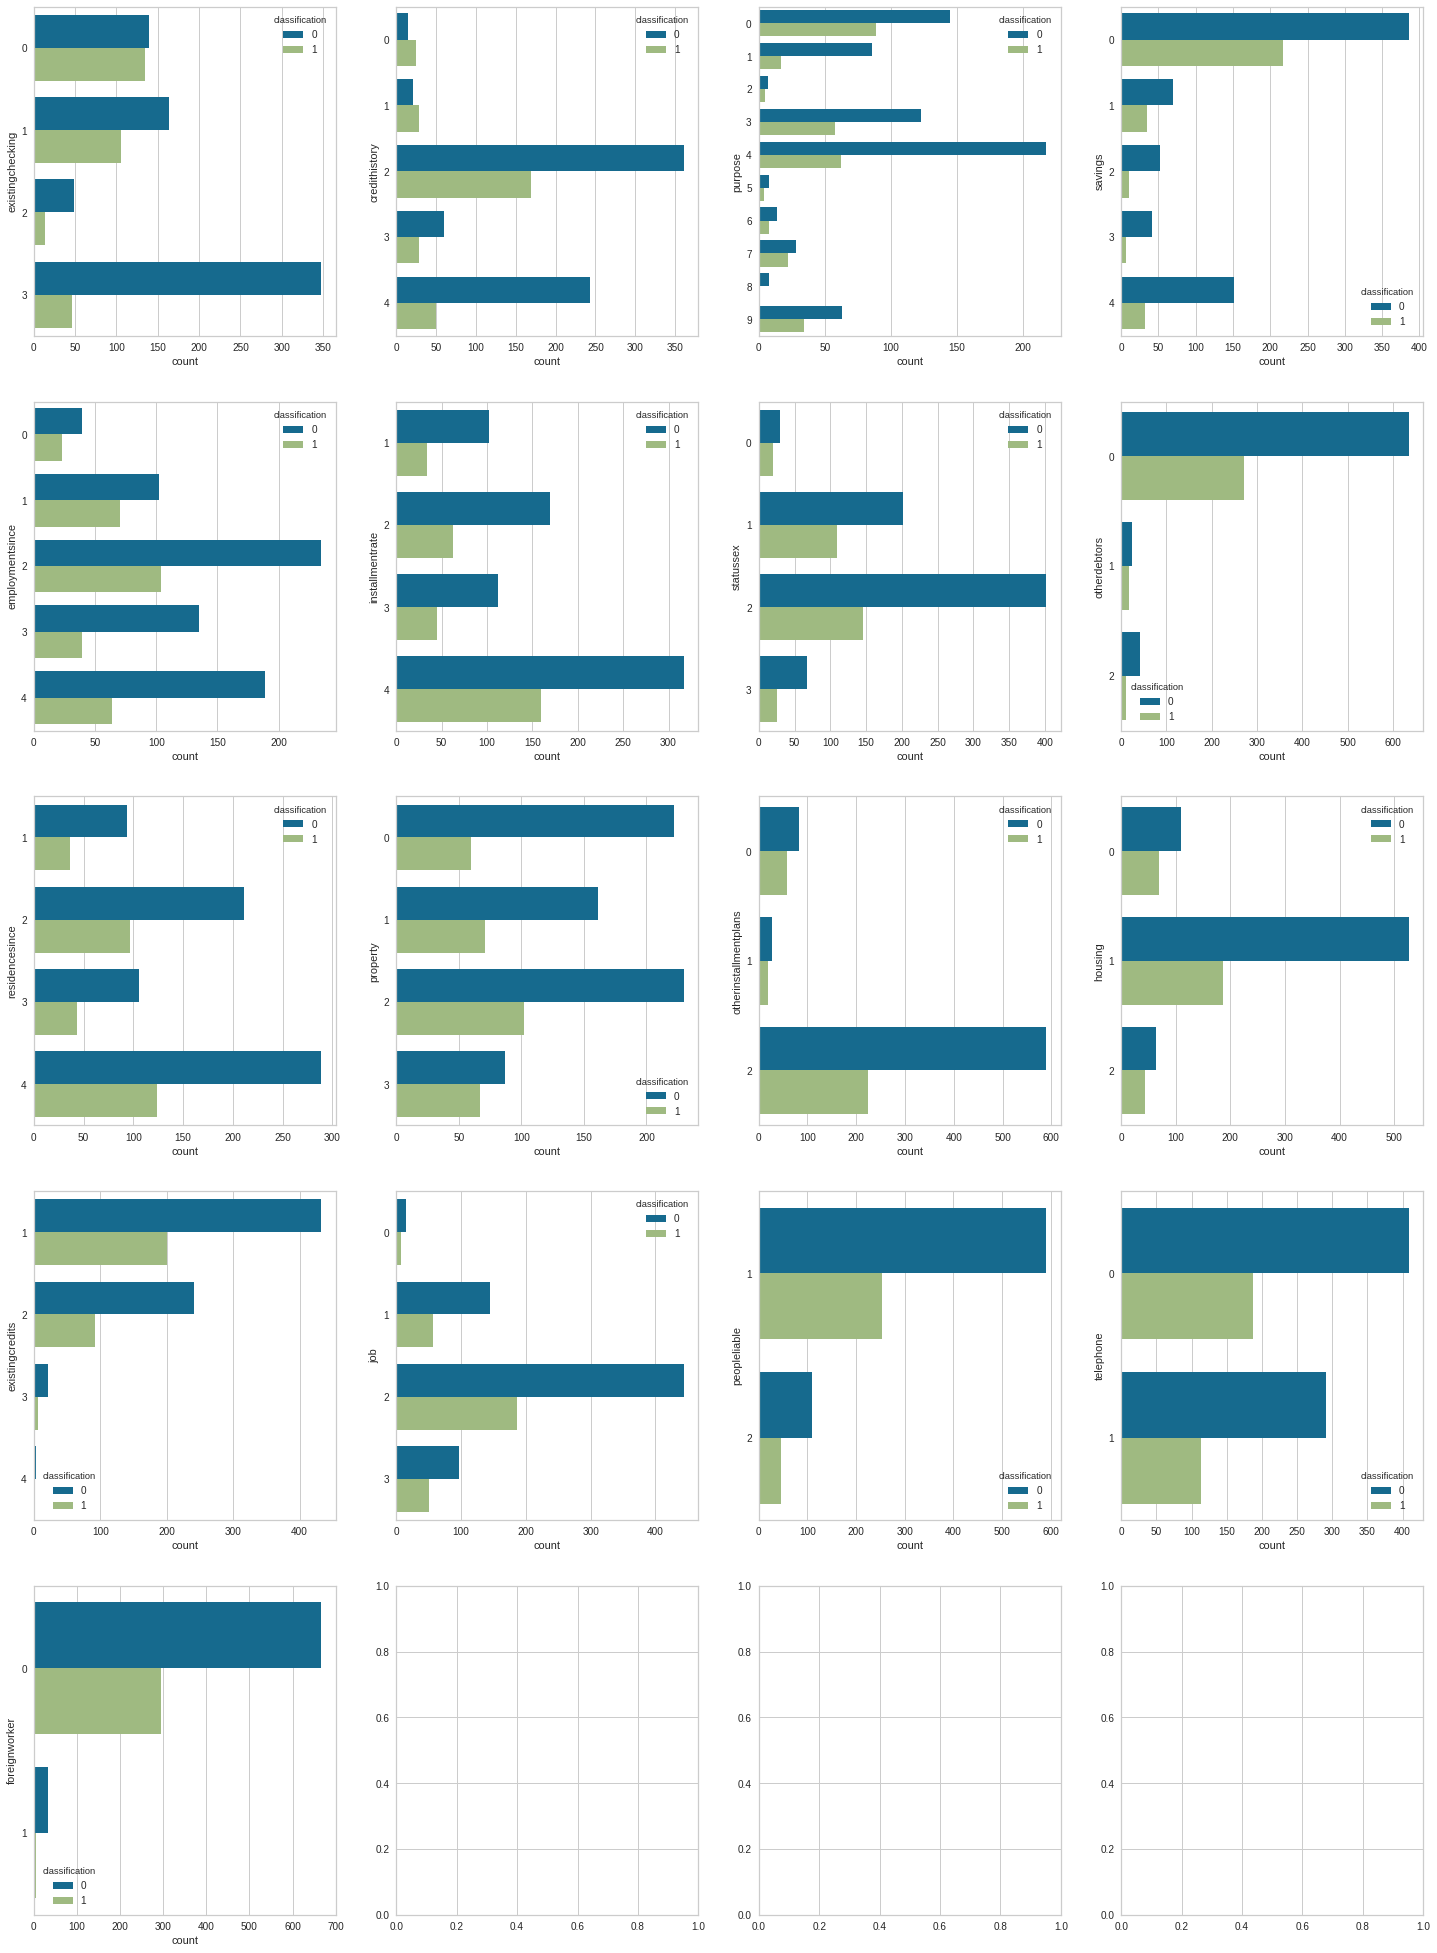

In [205]:
# Histograms for non-continuous attributes
f, axes = plt.subplots(5, 4,figsize=(8.3*3,11.7*3))
x=0
y=0
for column in data.drop(['classification','creditamount','duration','age'], axis=1):
    sns.countplot(y=column, hue="classification", data=data.drop(['creditamount','duration','age'],axis=1), ax=axes[x,y])
    y+=1
    if y>3:
        x+=1
        y=0
    if x>4:
        break
f.savefig("histograms5.png")

In [0]:
# list of numerical attributes
num=['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']

In [207]:
# Min max values of the idividual columns
maxs=[]
mins=[]
stds=[]
means=[]
for x in range(len(num)):
  maxs.append(data[num[x]].max())
  mins.append(data[num[x]].min())
  stds.append(data[num[x]].std())
  means.append(data[num[x]].mean())
cm = sns.light_palette("orange", as_cmap=True)
describe=pd.DataFrame({'columns':num,'max':maxs,'min':mins,'std':stds,'mean':means})
describe.style.background_gradient(cmap=cm)

,columns,max,min,std,mean
0,creditamount,18424,250,2822.736876,3271.258000
1,duration,72,4,12.058814,20.903000
2,installmentrate,4,1,1.118715,2.973000
3,residencesince,4,1,1.103718,2.845000
4,age,75,19,11.375469,35.546000
5,existingcredits,4,1,0.577654,1.407000
6,peopleliable,2,1,0.362086,1.155000
7,classification,1,0,0.458487,0.300000


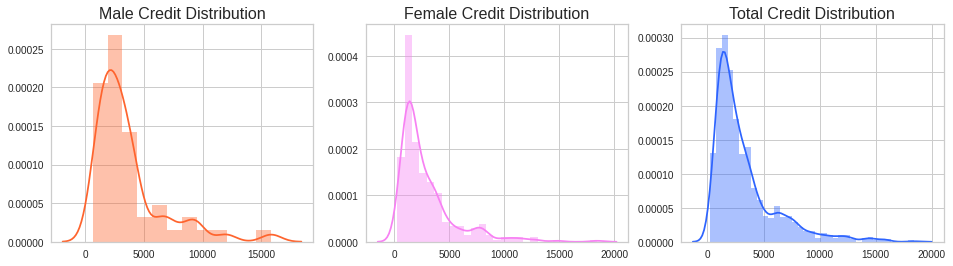

In [208]:
# Distribution of Credit_Amount for each Gender
male_credit = data["creditamount"].loc[data["statussex"] == 0].values
female_credit = data["creditamount"].loc[data["statussex"] == 1].values
total_credit = data['creditamount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.show()

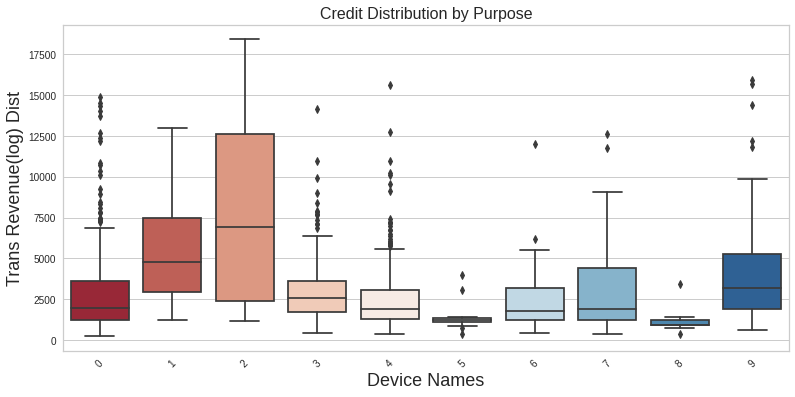

In [209]:
# credit amount for different purposes
plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='purpose', y='creditamount', 
                   data=data, palette="RdBu")


g.set_title("Credit Distribution by Purpose", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g.set_xlabel('Device Names', fontsize=18) # Xlabel
g.set_ylabel('Trans Revenue(log) Dist', fontsize=18) 
plt.show()

In [210]:
# purpose by different genders highest number are highlighted
data["purpose"].unique()
sex_by_purpose = pd.crosstab(data['purpose'], data['statussex']).apply(lambda x: x/x.sum() * 100)
cm = sns.light_palette("green", as_cmap=True)
sex_by_purpose.style.background_gradient(cmap=cm)

statussex,0,1,2,3
purpose,,,,
0,20.000000,22.580645,24.452555,21.739130
1,6.000000,7.741935,12.773723,6.521739
2,2.000000,0.967742,1.459854,0.000000
3,30.000000,23.870968,15.510949,7.608696
4,14.000000,27.419355,26.642336,45.652174
5,2.000000,1.935484,0.729927,1.086957
6,4.000000,1.612903,2.189781,3.260870
7,2.000000,6.774194,4.927007,1.086957
8,0.000000,0.967742,0.547445,3.260870


In [211]:
# job versus different genders
number_of_jobs = pd.crosstab(data["job"], data["statussex"]).apply(lambda x: x/x.sum() * 100)
cm = sns.light_palette("blue", as_cmap=True)
number_of_jobs.style.background_gradient(cmap=cm)

statussex,0,1,2,3
job,,,,
0,0.000000,3.870968,1.459854,2.173913
1,16.000000,20.645161,19.343066,23.913043
2,62.000000,63.548387,62.043796,67.391304
3,22.000000,11.935484,17.153285,6.521739


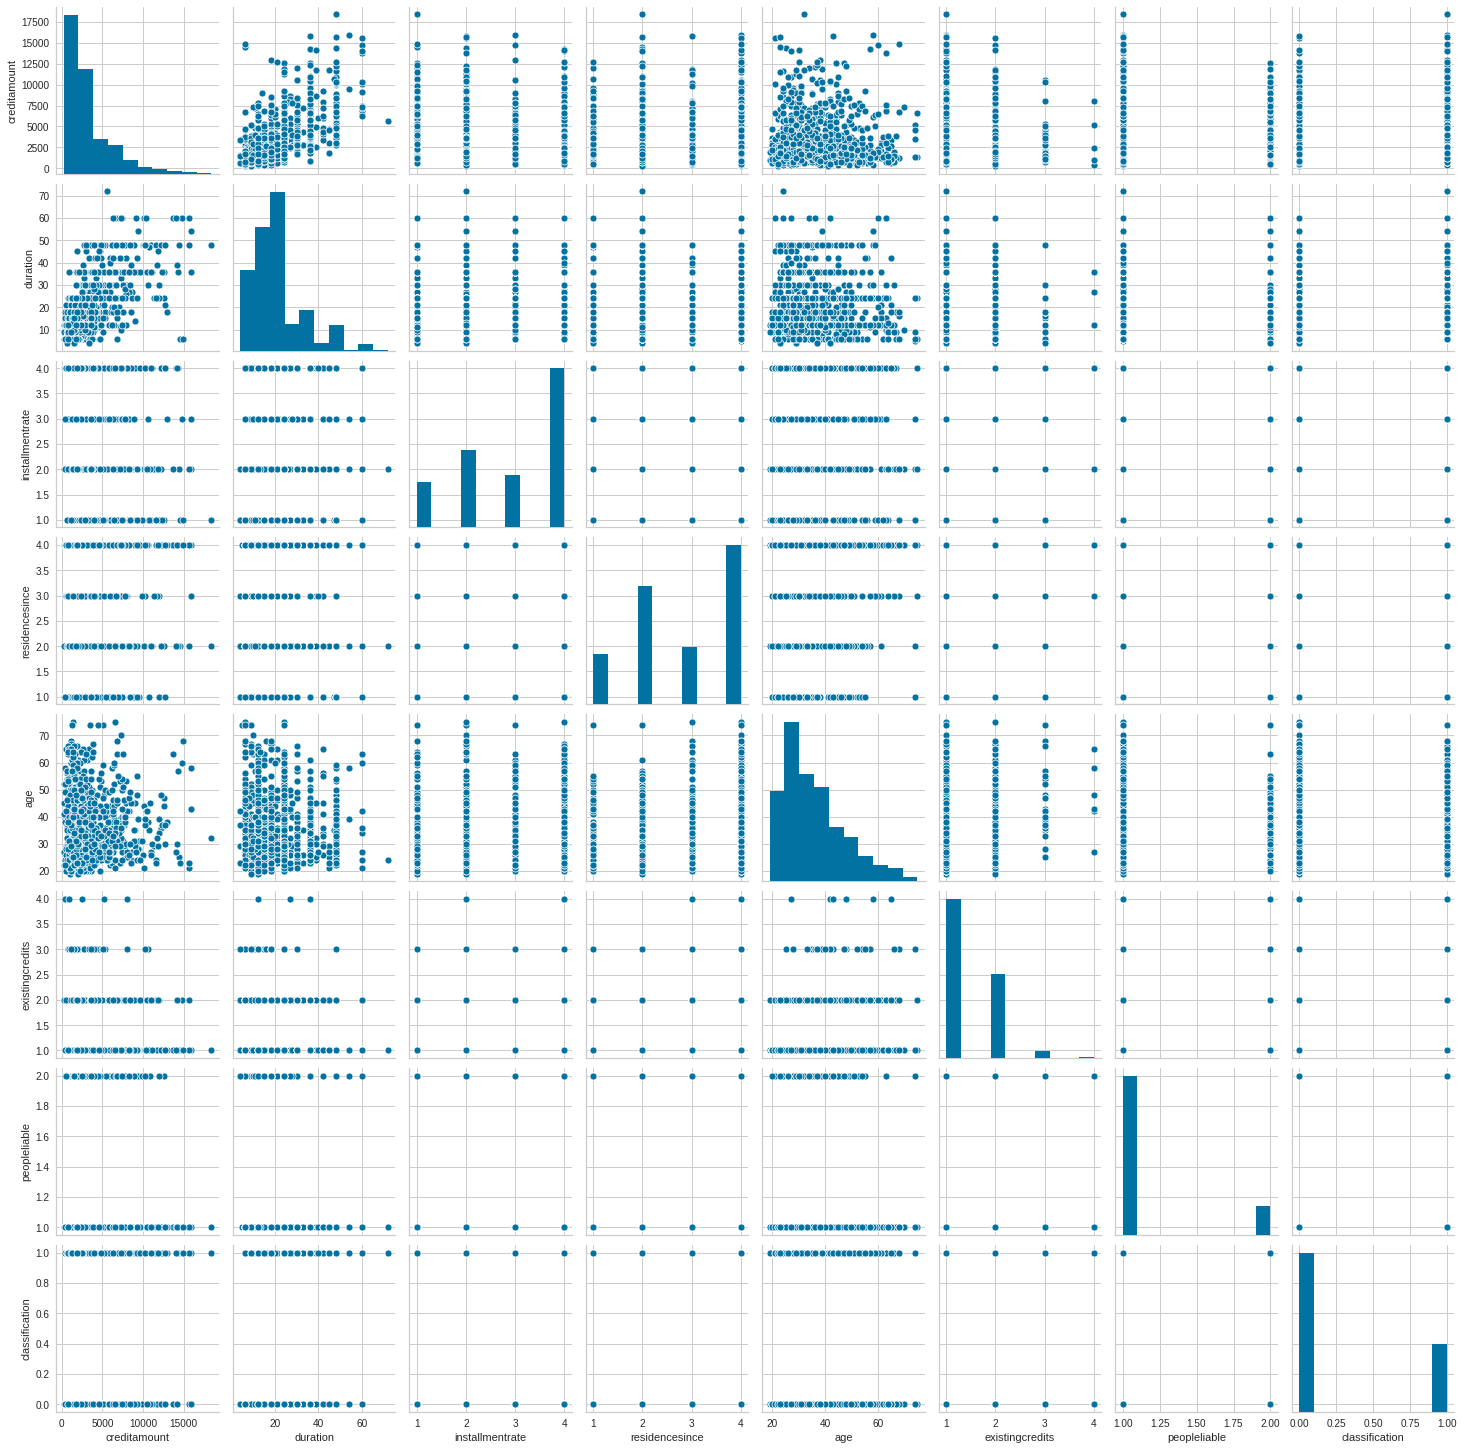

In [212]:
# Data distribution plots by every feature by feature
sns.pairplot(data[num])

In [213]:
# correlation plots for numerical features
corr = data[num].corr()
arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Pearson Correlation <br> (What Determines Risk in Loans?)'
fig.show()

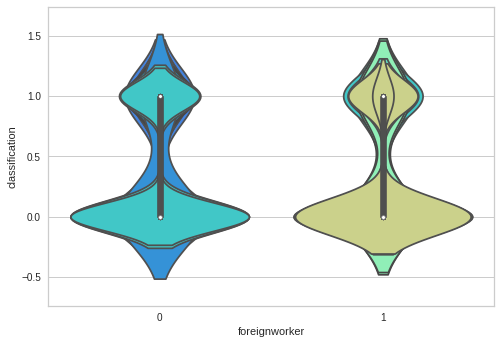

In [214]:
# voilin plot for different categorical features
for i in catg:
  sns.violinplot(x=i, y="classification", data=data,palette='rainbow')

In [0]:
# splitting data into train and test
X = data.drop('classification', axis=1)
y = data['classification']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3333, random_state=1)

In [216]:
# since i oberved class imbalances in the data here im trying to balance using SMOTE technique
sm = SMOTE(ratio='auto')
X_train, y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



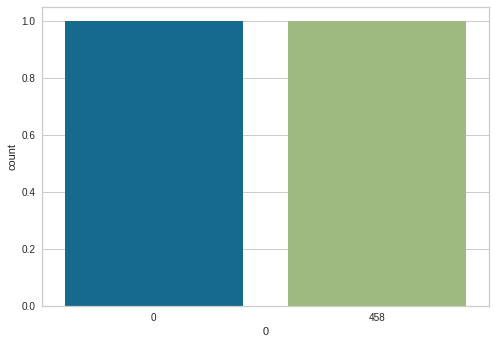

In [217]:
# Histogram showing balanced classes
sns.countplot(0,data=pd.DataFrame(np.unique(y_train, return_counts=True)))

### METRICS AS FUNCTIONS
### As i implemented all the metrics for each algorithm as function which coveres
  ### >> Accuracy
  ### >> Precision
  ### >> ROC AUC values
  ### >> Confusion matrix

In [0]:
# Function for evaluation reports
def evaluations(clf, X_train, y_train,y_test,y_pred):
    scores1 = cross_val_score(clf, X_train, y_train, cv=20, scoring='accuracy')
    scores2 = cross_val_score(clf, X_train, y_train, cv=20, scoring='precision')
    scores3 = cross_val_score(clf, X_train, y_train, cv=20, scoring='roc_auc')

    accu=scores1.mean()
    pre=scores2.mean()
    roc=scores3.mean()
    # Create and print confusion matrix
    confuse = confusion_matrix(y_test,y_pred)
    print(confuse)
    # plt.figure(figsize=(6,6))
    # sns.heatmap(confuse, cmap="CMRmap",annot_kws={"size": 6})
    return accu , pre ,roc

# Function to get roc curve
def get_roc_curve (y_test,y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return

### Supervised classifiers that  I focused in this kernel
  ### 1. Decision Tress
  ### 2. Random Forests
  ### 3. XG Boost
  ### 4. Logistic Regression
  ### 5. Linear SVM
  ### 6. Naive Bayes
  ### 7. K-nearest neighbour


In [0]:
# DECISION TREE CLASSIFIER

def tree_clf(X_train, y_train,X_test, y_test):
    print("DecisionTreeClassifier")
# Fit
    dec_tree = tree.DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=5).fit(X_train, y_train)
# predict
    y_pred = dec_tree.predict(X_test)
# evaluate 
    tree_eva=evaluations(dec_tree, X_train, y_train,y_test,y_pred)
    return tree_eva

# DECISION TREE VISUALISATION
def visualize_tree(clf,X_train,y_train):
    dot_data = export_graphviz(clf, out_file=None) 
    graph = pydotplus.graph_from_dot_data(dot_data) 
    graph.write_pdf("tree_clf.pdf") 
     
        
    dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=[str(x) for x in X_train.columns.tolist()],
                         class_names=[str(x) for x in clf.classes_],
                         filled=True, rounded=True,  
                         special_characters=True,
                         leaves_parallel=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    Image(graph.create_png()) 
    return

In [0]:
# RANDOM FOREST CLASSIFIER
def randomforest(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestClassifier().fit(X_train, y_train)

    y_pred = randomforest.predict(X_test)

    random_eva=evaluations(randomforest, X_train, y_train,y_test,y_pred)
    return random_eva

In [0]:
# XG BOOST CLASSIFIER
def xgboost(X_train, y_train,X_test, y_test):
  # X_train=X_train.values
  # y_train=y_train.values
  # X_test =X_test.values
  # y_test=y_test.values
  print("XG Boost algorithm")
  xg = XGBClassifier(random_state=2)
  xg=xg.fit(X_train,y_train)

  y_pred = xg.predict(X_test.values)

  xg_eva=evaluations(xg, X_train, y_train,y_test,y_pred)
  return xg_eva


In [0]:
# LOGISTIC REGRESSION
def logreg(X_train, y_train,X_test, y_test):
    print("LogisticRegression")
    logreg = LogisticRegression().fit(X_train, y_train)

    y_pred = logreg.predict(X_test)
    log_eva=evaluations(logreg, X_train, y_train,y_test,y_pred)
    return log_eva

In [0]:
# LINEAR SVM
def linearsvmclf(X_train, y_train, X_test, y_test, C): 
    print("LinearSVC")
    lin_svc = svm.LinearSVC(C=C, class_weight="balanced",dual=False).fit(X_train, y_train)

    y_pred = lin_svc.predict(X_test)
    
    svm_eva=evaluations(lin_svc, X_train, y_train,y_test,y_pred)
    return svm_eva

In [0]:
# NAIVE BAYES CLASSIFIER
def naive_bayes(X_train, y_train, X_test, y_test):  
    print("GaussianNB")
    naive = GaussianNB().fit(X_train, y_train)

    y_pred = naive.predict(X_test)

    naive_eva=evaluations(naive, X_train, y_train,y_test,y_pred)
    return naive_eva

In [0]:
# K-NEAREST NEIGHBOUR CLASSIFIER
def knn(X_train, y_train, X_test, y_test):  
    print("KNeighborsClassifier")
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    knn_eva=evaluations(knn, X_train, y_train,y_test,y_pred)
    return knn_eva

In [226]:
# CORRELATION DATAFRAME IN DESCENDING ORDER
c = data.corr(method='pearson')
single=c.stack()
final = pd.DataFrame(single[(0.25<single) & (single<1) | (-1<single) & (single<-0.25)].sort_values(ascending=False, kind='quicksort'))
(final.style.background_gradient(cmap='viridis', low=.5, high=0).highlight_null('red'))

,,0
duration,creditamount,0.624984
creditamount,duration,0.624984
credithistory,existingcredits,0.437066
existingcredits,credithistory,0.437066
job,telephone,0.383022
telephone,job,0.383022
property,housing,0.345219
housing,property,0.345219
creditamount,property,0.311599
property,creditamount,0.311599


In [0]:
# NORMALISING THE FEATURE VARIABLES
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [228]:
rfe = RFE(LogisticRegression(), 50)
fit = rfe.fit(X_train_norm, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 20
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [0]:
X_std = StandardScaler().fit_transform(data)

### Unsupervised algorithms that i focused in this kernel are below.
### 1. Latent manifold
### 2. Latent variable
### 3. PCA
### 4. K-Means clustering
### 5. Fractual clustering to get the priority features.
### ps: Visualisations and plots explaining the work

In [0]:
# LATENT MANIFOLD 

def latent_manifold(X,y):

  classes=['loan','noloan']
# Create a pipeline
  model = Pipeline([("selectk", SelectKBest(k=5, score_func=f_classif)),("viz", Manifold(manifold="isomap", n_neighbors=10, classes=classes))])   
  model.fit_transform(X, y)          
  model.named_steps['viz']
  return


In [0]:
# LATENT VARIABLE

def latent_variables(X_std):
  fac = FactorAnalyzer()
  fac.fit(X_std)
  cm1 = sns.light_palette("yellow", as_cmap=True)
  fac1=pd.DataFrame(fac.loadings_).style.background_gradient(cmap=cm1)
  return fac1


In [0]:
# PRICIPLE COMPONENT ANALYSIS

def pca(X_std):
  pca = PCA(n_components=3)
  principle=pca.fit_transform(X_std)
  print(pca.explained_variance_ratio_) 
  features = range(pca.n_components_)

# Visualisation -1
  plt.bar(features, pca.explained_variance_ratio_, color='PINK')
  plt.xlabel('PCA features')
  plt.ylabel('variance %')
  plt.xticks(features)
  plt.show()

# Visualisation - 2
  plt.scatter(pca.components_[0], pca.components_[1], alpha=.1, color='green')
  plt.xlabel('PCA 1')
  plt.ylabel('PCA 2')
  plt.show()

# Visualisation - 3
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')
  ax.scatter(
    xs=pca.components_[0], 
    ys=pca.components_[1], 
    zs=pca.components_[2], 
    cmap='tab10'
)
  ax.set_xlabel('pca-one')
  ax.set_ylabel('pca-two')
  ax.set_zlabel('pca-three')
  ax.view_init(30, 185)
  plt.show()
  return principle

In [0]:
# KMEANS CLUSTERING

def kmeans(principle):
  
  inertias = []
  centers ={}
  inertia ={}
  K=range(1,10)
  for k in K:
    model = KMeans(n_clusters=k)
    
    model.fit(principle)
    
  # Inertias for appending
    inertias.append(model.inertia_)

    centers[k] = sum(np.min(cdist(principle, model.cluster_centers_, 'euclidean'),axis=1)) / principle.shape[0] 
    inertia[k] = model.inertia_ 

  keys=[]
  vals=[]
  for key,val in centers.items(): 
    #print(str(key)+' : '+str(val))
    keys.append(key)
    vals.append(val)             
    # print(dat).style.background_gradient(cmap=cm))
  dat=pd.DataFrame(columns=[keys,vals])
  cm1 = sns.light_palette("yellow", as_cmap=True)
  dat1=dat.style.background_gradient(cmap=cm1)

    
  # Visualisations  
  plt.plot(K,inertias, '-o', color='black')
  plt.xlabel('number of clusters, k')
  plt.ylabel('inertia')
  plt.show()

  plt.scatter(principle[:, 0], principle[:, 1], c=model.predict(principle), s=50, cmap='viridis')
  centers = model.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
  return dat1
   

[0.12111578 0.10189185 0.07032271]


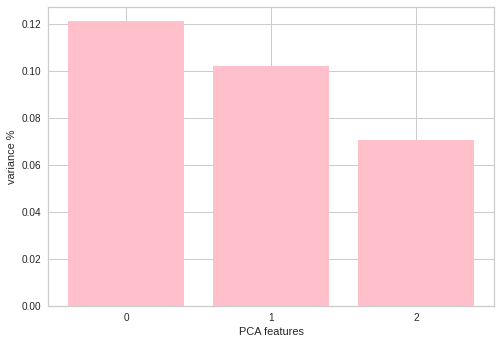

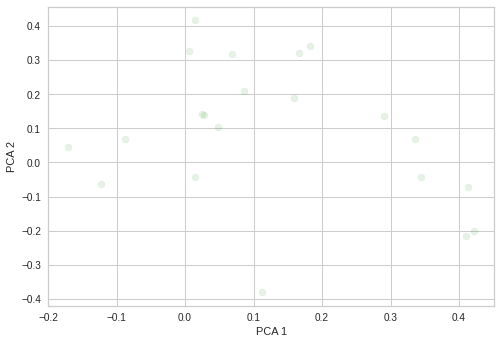

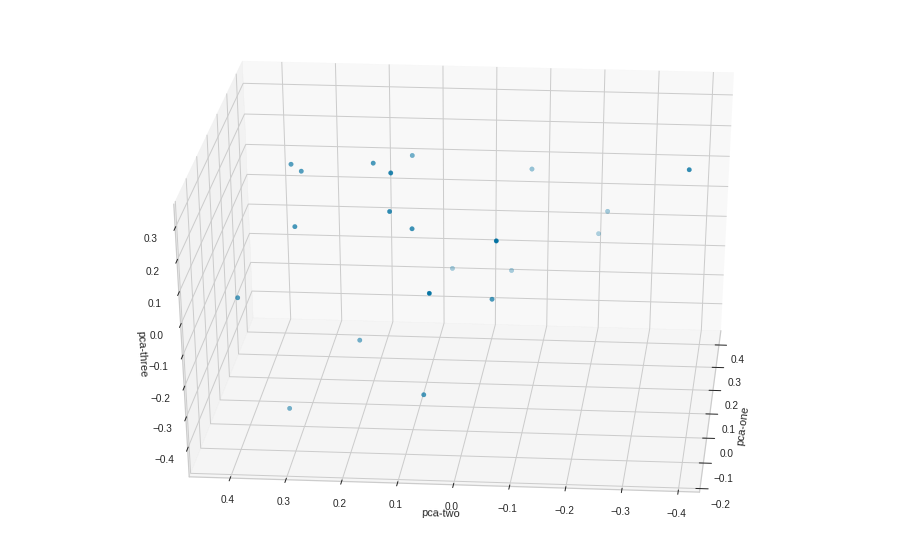

In [234]:
pca=pca(X_std)

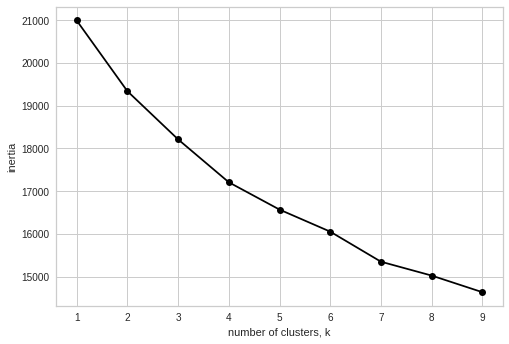

,1,2,3,4,5,6,7,8,9
,4.472810392041287,4.29223012857307,4.162468094797314,4.064782272858515,3.9817184343887084,3.9199147600745916,3.837169762389912,3.795035848435423,3.7447148037160973


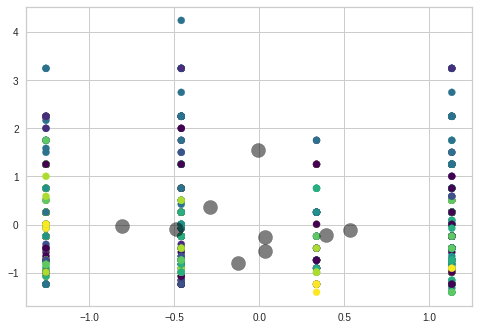

In [235]:
kmeans(X_std)

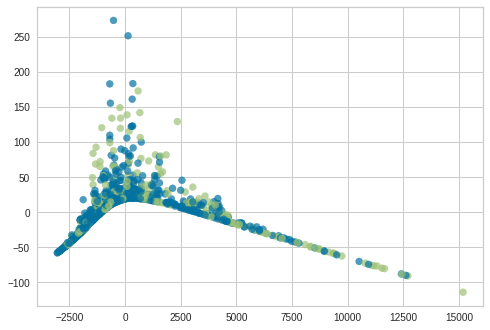

In [236]:
latent_manifold(X,y)

### The below cell explaining the important od each feature as 20 features list orderwise

In [237]:
print("LATENT VARIABLE THREE FACTORS")
latent_variables(X_std)

LATENT VARIABLE THREE FACTORS


,0,1,2
0,0.028542,-0.034597,0.567347
1,0.661784,-0.135645,-0.149652
2,-0.055058,0.251678,0.363726
3,0.025519,-0.040405,-0.002228
4,0.774574,-0.259660,-0.013174
5,0.105121,0.020397,0.280525
6,0.077403,0.412832,0.107869
7,-0.043023,0.237555,-0.086797
8,-0.016652,0.141071,0.044845
9,-0.135266,-0.012479,-0.102988


In [238]:
# RUNNING ALL THE FUNCTION AND USING ACCURACY, PRECISION, ROC_AUC RATES AND CONFUSION MATRICS AS ERROR METRICS.
tree= tree_clf(X_train,y_train,X_test,y_test)
logistic= logreg(X_train_norm, y_train,X_test_norm, y_test)
linearsvm= linearsvmclf(X_train, y_train,X_test, y_test,5)
bayes= naive_bayes(X_train, y_train,X_test, y_test)
xgb= xgboost(X_train,y_train,X_test,y_test)
knear= knn(X_train,y_train,X_test,y_test)

DecisionTreeClassifier
[[183  59]
 [ 49  43]]
LogisticRegression
[[ 89 153]
 [ 25  67]]
LinearSVC
[[191  51]
 [ 36  56]]
GaussianNB
[[178  64]
 [ 29  63]]
XG Boost algorithm
[[202  40]
 [ 46  46]]
KNeighborsClassifier
[[137 105]
 [ 55  37]]


In [0]:
supervised_metrics =[tree,logistic,linearsvm,bayes,xgb,knear]

### Below is the table explaining the over all metrics and performance of individual supervised models upon data

In [242]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '20px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#FFC0CB')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '20px')
  ]

tf_props = [
  ('font-size', '20px')
  ]
# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="td", props=tf_props),
  ]

cm1 = sns.light_palette("lightblue", as_cmap=True)
final=pd.DataFrame(np.array(supervised_metrics),columns=['accuracy','precision','roc_auc'],index=["decision_tree","logistic_regression","linear_svm","naive_bayes","XG_Boost","KNN"])
(final.style.background_gradient(cmap=cm1).highlight_max(subset=['accuracy'])
  .set_caption('EVALUATION METRICS ON ALL SUPERVISED ALGORITHMS AS CHART.')
  .format({'accuracy': "{:.2%}"})
  .set_table_styles(styles))

,accuracy,precision,roc_auc
decision_tree,75.92%,0.766146,0.815170
logistic_regression,56.36%,0.550094,0.602079
linear_svm,78.97%,0.788455,0.852982
naive_bayes,75.26%,0.719445,0.829674
XG_Boost,82.14%,0.810580,0.897199
KNN,68.80%,0.672902,0.739781


## **CONCLUSION**

### 1. Since the data is purely a binary classification problem supervised algorithms performed better than unsupervised 
### 2. Traget feature is binary label so a linear regression model cant apply.
### 3. Upon all the model we can see in the above chart XG boost performing better.
### **4. Tried to DO data enrinchment by tweeking the k fold validation number and these are the best found results.**